In [ ]:
# import the opencv library
import cv2
import torch # 토치 추가
import numpy as np

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best1.pt')  # local model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-1 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
import cv2

filepath = '/content/drive/MyDrive/datasets/two.mp4'
video = cv2.VideoCapture(filepath) #'' 사이에 사용할 비디오 파일의 경로 및 이름을 넣어주도록 함

if not video.isOpened():
    print("Could not Open :", filepath)
    exit(0)

In [ ]:
#불러온 비디오 파일의 정보 출력
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 415
width : 1080
height : 720
fps : 24.0


In [ ]:
'''
import os

#프레임을 저장할 디렉토리를 생성
try:
    if not os.path.exists(filepath[:-4]):
        os.makedirs(filepath[:-4])
except OSError:
    print ('Error: Creating directory. ' +  filepath[:-4])
    '''

"\nimport os\n\n#프레임을 저장할 디렉토리를 생성\ntry:\n    if not os.path.exists(filepath[:-4]):\n        os.makedirs(filepath[:-4])\nexcept OSError:\n    print ('Error: Creating directory. ' +  filepath[:-4])\n    "

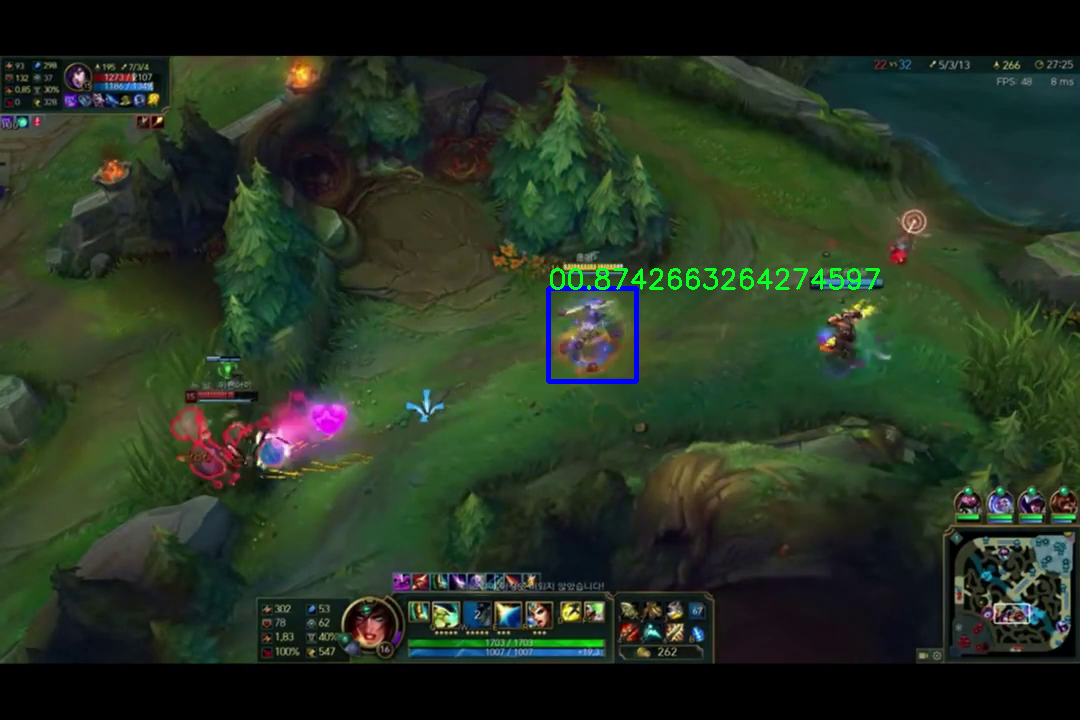

KeyboardInterrupt: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

count = 0
blue_color=(255,0,0)

while(video.isOpened()):
    ret, image = video.read()
    if(int(video.get(1)) % fps == 0): #앞서 불러온 fps 값을 사용하여 1초마다 추출
        results=model(image)
        for i in range(len(results.pandas().xyxy[0].xmin)):
          if(results.pandas().xyxy[0].confidence[i]>=0.7):
            image=cv2.rectangle(image, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), blue_color, 3)
            cv2.putText(image, results.pandas().xyxy[0].name[i]+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            cv2_imshow(image)

video.release()

In [ ]:
# import the opencv library
import cv2
import torch # 토치 추가
import numpy as np
from google.colab.patches import cv2_imshow

# define a video capture object

blue_color=(255,0,0)
other_color=(0, 0, 255)

while(video.isOpened()):
	img=np.zeros((1080, 1920, 3), np.uint8) # 빈 캔버스 만들기
	img=cv2.rectangle(img, (10, 10), (100, 100), blue_color, 3) # 제일 왼쪽 위에 꺼, 오른쪽 아래꺼


    # Capture the video frame
	# by frame
	ret, frame = video.read()


	results=model(frame) # 만든 모델로 frame 분석!
	print(results.pandas().xyxy[0].to_json(orient="records"))
	print(results.pandas().xyxy[0].xmin)
	print(len(results.pandas().xyxy[0].xmin))
	for i in range(len(results.pandas().xyxy[0].xmin)):
		if(results.pandas().xyxy[0].name[i]=="0" and results.pandas().xyxy[0].confidence[i]>=0.7):
			frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), blue_color, 3)
			cv2.putText(frame, "use "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
			cv2_imshow(frame)
		if(results.pandas().xyxy[0].name[i]=="1" and results.pandas().xyxy[0].confidence[i]>=0.7):
			frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), other_color, 3)
			cv2.putText(frame, "success "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
			cv2_imshow(frame)

# After the loop release the cap object
video.release()
# Destroy all the windows
cv2.destroyAllWindows()


AttributeError: ignored

In [ ]:
# import the opencv library
import cv2
import torch # 토치 추가
import numpy as np
from google.colab.patches import cv2_imshow

# define a video capture object

blue_color=(255,0,0)
other_color=(0, 0, 255)
use=False # e 스킬 사용했는지 확인!
sucess=False # e 스킬 성공했는지 확인!
f=fps # 60 프레임 보겠다!
count_good=0 # 성공 횟수!
count_bad=0 # 실패 횟수!
count_frame=0 # 3번 동안 성공 유지했는지 보겠다!

while(video.isOpened()):

    # Capture the video frame
	# by frame
  ret, frame = video.read()
  if(type(frame)==type(None)):
    continue

  results=model(frame) # 만든 모델로 frame 분석!
  print(results.pandas().xyxy[0].to_json(orient="records"))
  print(results.pandas().xyxy[0].xmin)
  print(len(results.pandas().xyxy[0].xmin))
  for i in range(len(results.pandas().xyxy[0].xmin)):
    if(results.pandas().xyxy[0].name[i]=="0" and results.pandas().xyxy[0].confidence[i]>=0.7): # 스킬 발동했다면
      frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), blue_color, 3)
      cv2.putText(frame, "use "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
      cv2_imshow(frame)
      use=True # use를 True로 변경!
    if(use==True): # 만약, use가 True라면
      if(f>0): # f(프레임수)가 0보다 크다면
        if(results.pandas().xyxy[0].name[i]=="1" and results.pandas().xyxy[0].confidence[i]>=0.7): # 만약, 성공했다면
          count_frame+=1 # 성공 프레임 1 증가하기
          if(count_frame>=3): # 성공 프레임이 3개라면
            frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), other_color, 3)
            cv2.putText(frame, "success "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            cv2_imshow(frame)
            count_good+=1 # 성공 횟수 1 증가시키기
            f=60 # 프레임 세는 것도 초기화하기
            use=False # use를 False로 바꾸기
        f-=1 # f를 1 감소시키기기
      else:
        f=fps
        count_bad+=1
        use=False

# After the loop release the cap object
video.release()

print(count_good)
print(count_bad)

# Destroy all the windows
cv2.destroyAllWindows()

[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([], Name: xmin, dtype: object)
0
[]
Series([

KeyboardInterrupt: ignored

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,857 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

oid

 

 

Ue bend Se Weed

 



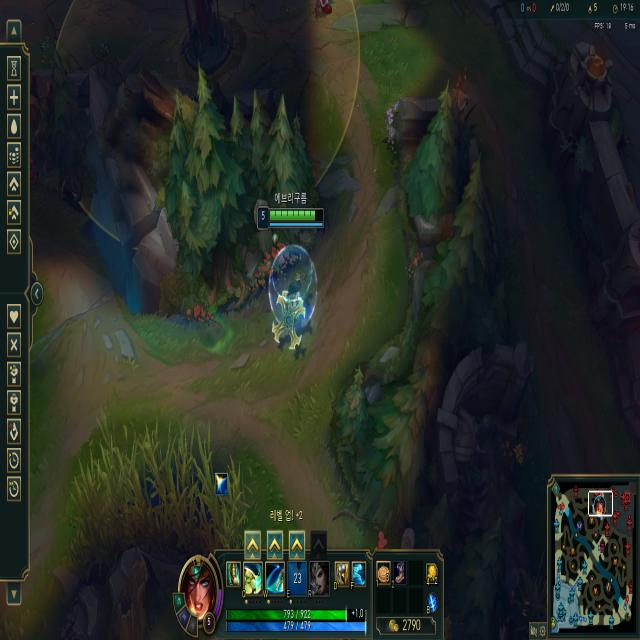

In [ ]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow

#이미지를 불러와 gray 스케일로 변환해 준다.

image = cv2.imread('/content/drive/MyDrive/datasets/image01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

#pytesseract의 image to string을 써준다.
#숫자니까 lang = 'None'으로

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

#결과를 보자.

print(text)
cv2_imshow(image)

In [ ]:
import cv2

def get_duration(filename):
    return video.get(cv2.CAP_PROP_POS_MSEC)

print(get_duration(video))

0.0


In [ ]:
import cv2 as cv

cap = cv.VideoCapture('/content/drive/MyDrive/datasets/two.mp4')
fps = cap.get(cv.CAP_PROP_FPS)      # OpenCV v2.x used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

print('fps = ' + str(fps))
print('number of frames = ' + str(frame_count))
print('duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))

cap.release()

fps = 24.0
number of frames = 415
duration (S) = 17.291666666666668
duration (M:S) = 0:17.291666666666668


In [ ]:
# import the opencv library
import cv2
import torch # 토치 추가
import numpy as np
import time

# define a video capture object

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best1.pt')  # local model
filepath = '/content/drive/MyDrive/datasets/two.mp4'
video = cv2.VideoCapture(filepath) #'' 사이에 사용할 비디오 파일의 경로 및 이름을 넣어주도록 함

if not video.isOpened():
    print("Could not Open :", filepath)
    exit(0)

#불러온 비디오 파일의 정보 출력
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

fourcc=cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer=cv2.VideoWriter('./result.mp4', fourcc, fps, (width, height))

blue_color=(255,0,0)
other_color=(0, 0, 255)
use=False # e 스킬 사용했는지 확인!
sucess=False # e 스킬 성공했는지 확인!
f=fps # 60 프레임 보겠다!
count_good=0 # 성공 횟수!
count_bad=0 # 실패 횟수!
count_frame=0 # 3번 동안 성공 유지했는지 보겠다!
frame_index=0

while(video.isOpened() and frame_index<length):
  #print("start time : ", time.time())
    # Capture the video frame
	# by frame
  ret, frame = video.read()
  if(type(frame)==type(None)):
    continue

  results=model(frame) # 만든 모델로 frame 분석!
  #print(results.pandas().xyxy[0].to_json(orient="records"))
  #print(results.pandas().xyxy[0].xmin)
  #print(len(results.pandas().xyxy[0].xmin))
  for i in range(len(results.pandas().xyxy[0].xmin)):
    if(results.pandas().xyxy[0].name[i]=="0" and results.pandas().xyxy[0].confidence[i]>=0.7): # 스킬 발동했다면
      frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), blue_color, 3)
      cv2.putText(frame, "use "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
      if(use==False):
          print("시비르 E 발동 시간 : ", frame_index/fps)
          use=True # use를 True로 변경!

    if(use==True): # 만약, use가 True라면
      if(f>0): # f(프레임수)가 0보다 크다면
        if(results.pandas().xyxy[0].name[i]=="1" and results.pandas().xyxy[0].confidence[i]>=0.7): # 만약, 성공했다면
          count_frame+=1 # 성공 프레임 1 증가하기
          if(count_frame>=3): # 성공 프레임이 3개라면
            frame=cv2.rectangle(frame, (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), (int(results.pandas().xyxy[0].xmax[i]), int(results.pandas().xyxy[0].ymax[i])), other_color, 3)
            cv2.putText(frame, "success "+str(results.pandas().xyxy[0].confidence[i]), (int(results.pandas().xyxy[0].xmin[i]), int(results.pandas().xyxy[0].ymin[i])), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            count_good+=1 # 성공 횟수 1 증가시키기
            f=60 # 프레임 세는 것도 초기화하기
            use=False # use를 False로 바꾸기
            print("시비르 E 성공 시간 : ", frame_index/fps)
            #cv2.imshow('frame.jpg', frame)
            #cv2.waitKey(0)
            ##writer.write(frame)

        f-=1 # f를 1 감소시키기기
      else:
        print("시비르 E 실패 시간 : ", frame_index/fps)
        f=fps
        count_bad+=1
        use=False
  writer.write(frame)
  #print("end time : ", time.time())
  frame_index+=1

# After the loop release the cap object
video.release()
writer.release()

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)
print("성공 : ", count_good)
print("실패 : ", count_bad)
print("성공률 : ", count_good/(count_good+count_bad))
print("게임 시간 : ", length/fps)


# Destroy all the windows
cv2.destroyAllWindows()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-1 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


시비르 E 발동 시간 :  7.541666666666667
시비르 E 실패 시간 :  10.458333333333334
시비르 E 발동 시간 :  15.916666666666666
length : 415
width : 1080
height : 720
fps : 24.0
성공 :  0
실패 :  1
성공률 :  0.0
게임 시간 :  17.291666666666668
